# Analyze Supermarket Data Across the Country - Company XYZ

Company XYZ owns a supermarket chain across the country. Each major branch located in 3 cities across the country recorded sales information for 3 months, to help the company understand sales trends and determine its growth, as the rise of supermarkets competition is seen.

You will apply learnings to analyse the dataset in the data folder, and the description of each feature can be found in this [link](https://docs.google.com/document/d/1Sv-DlynHpOBAs5qKokn5MtbzqZcumTSlSI4-wQ0kf0w/edit?usp=sharing)

## Loading the Dataset
In this step, you will combine the dataset from each branch (3 branches) into one dataset for easy analysis. You expected to write the syntaxes that will read multiple files from your current working directory and export a CSV file after combining. 
The learning from this step is the ability to automate reading and combining multiple CSV files, because as a Data Professional, you will saddled with the responsibility of reading data from different sources, and this is one of the use case.

#### Import Libraries

In [63]:
import os
from glob import glob
import pandas as pd
os.getcwd() # to get the current working directory
os.chdir("C:/Users/user/Desktop/jupyter/Pandas-Analytics-Project/xyz_data_files") #Current working directory that contains your dataset and code file

#### Use glob to match the pattern "csv"

In [64]:
extension = 'csv'
files = glob('*.csv') # I used glob() to read and put all the csv files in a list
files

['Abuja_Branch.csv', 'Lagos_Branch.csv', 'Port_Harcourt_Branch.csv']

#### Combine all the files in the generated list above and export to a CSV
Tips - Use the `pd.concat` method

In [65]:
xyz_df = pd.concat((pd.read_csv(file) 
                    for file in files), 
                   ignore_index = True)  # I used a for loop to repeat the pd.read_csv() for all the files in files and then concatenate them to a single dataframe
xyz_df.head(4)

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating
0,692-92-5582,B,Abuja,Member,Female,Food and beverages,19742.4,3,2961.36,62188.56,2/20/2019,13:27,Card,59227.2,4.761905,2961.36,5.9
1,351-62-0822,B,Abuja,Member,Female,Fashion accessories,5212.8,4,1042.56,21893.76,2/6/2019,18:07,Epay,20851.2,4.761905,1042.56,4.5
2,529-56-3974,B,Abuja,Member,Male,Electronic accessories,9183.6,4,1836.72,38571.12,3/9/2019,17:03,Cash,36734.4,4.761905,1836.72,6.8
3,299-46-1805,B,Abuja,Member,Female,Sports and travel,33739.2,6,10121.76,212556.96,1/15/2019,16:19,Cash,202435.2,4.761905,10121.76,4.5


In [66]:
#### I changed the directory back to the original directory using the code chunk below
os.chdir("C:/Users/user/Desktop/jupyter/Pandas-Analytics-Project")

In [67]:
#Export to csv

xyz_df.to_csv('xyz_df.csv', index=False)

#### Read the CSV file using `pd.read_csv` method

In [68]:
df = pd.read_csv('xyz_df.csv', index_col=False)

## Data Exploration
In this step you will explore the loaded dataset using some built-in Pandas function. You expected to begin to think about your analytical approach from here. 
You can include other methods that you might think will make your exploration process easier. For Instance, you can write a function that print out a summary of the missing data occurence in the data. Be sure to document these methods using `markdown` and in-line `comments`.

### Import Libraries

In [69]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('fivethirtyeight')  
import warnings
warnings.filterwarnings('ignore')
import datetime as dt

#### Use the head() method to view first few rows of the dataset

In [70]:
#[Write your Code Here]
df.head()

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating
0,692-92-5582,B,Abuja,Member,Female,Food and beverages,19742.4,3,2961.36,62188.56,2/20/2019,13:27,Card,59227.2,4.761905,2961.36,5.9
1,351-62-0822,B,Abuja,Member,Female,Fashion accessories,5212.8,4,1042.56,21893.76,2/6/2019,18:07,Epay,20851.2,4.761905,1042.56,4.5
2,529-56-3974,B,Abuja,Member,Male,Electronic accessories,9183.6,4,1836.72,38571.12,3/9/2019,17:03,Cash,36734.4,4.761905,1836.72,6.8
3,299-46-1805,B,Abuja,Member,Female,Sports and travel,33739.2,6,10121.76,212556.96,1/15/2019,16:19,Cash,202435.2,4.761905,10121.76,4.5
4,319-50-3348,B,Abuja,Normal,Female,Home and lifestyle,14508.0,2,1450.80,30466.80,3/11/2019,15:30,Epay,29016.0,4.761905,1450.80,4.4


In [71]:
# to check the number of unique Invoice ID in the data frame, I used the following code chunk
df['Invoice ID'].nunique()

1000

#### Check the number of rows and columns present in the data using the shape attribute.

In [72]:
#[Write your Code Here]
df.shape

(1000, 17)

#### Generate the names of the columns using the columns attribute.

In [73]:
#[Write your Code Here]
df.columns

Index(['Invoice ID', 'Branch', 'City', 'Customer type', 'Gender',
       'Product line', 'Unit price', 'Quantity', 'Tax 5%', 'Total', 'Date',
       'Time', 'Payment', 'cogs', 'gross margin percentage', 'gross income',
       'Rating'],
      dtype='object')

In [74]:
columns = df.columns.str.lower() # I changed all the columns to lower case for ease of readability
columns

Index(['invoice id', 'branch', 'city', 'customer type', 'gender',
       'product line', 'unit price', 'quantity', 'tax 5%', 'total', 'date',
       'time', 'payment', 'cogs', 'gross margin percentage', 'gross income',
       'rating'],
      dtype='object')

In [75]:
df.columns = columns # I reasigned the column to change the irregular column format that was used
df.head(4) 

,invoice id,branch,city,customer type,gender,product line,unit price,quantity,tax 5%,total,date,time,payment,cogs,gross margin percentage,gross income,rating
0,692-92-5582,B,Abuja,Member,Female,Food and beverages,19742.4,3,2961.36,62188.56,2/20/2019,13:27,Card,59227.2,4.761905,2961.36,5.9
1,351-62-0822,B,Abuja,Member,Female,Fashion accessories,5212.8,4,1042.56,21893.76,2/6/2019,18:07,Epay,20851.2,4.761905,1042.56,4.5
2,529-56-3974,B,Abuja,Member,Male,Electronic accessories,9183.6,4,1836.72,38571.12,3/9/2019,17:03,Cash,36734.4,4.761905,1836.72,6.8
3,299-46-1805,B,Abuja,Member,Female,Sports and travel,33739.2,6,10121.76,212556.96,1/15/2019,16:19,Cash,202435.2,4.761905,10121.76,4.5


#### Statiscal Summary
The describe method provides the data statistical summary for the dataset, use the method to explore the statistical summary.

In [76]:
#[Write your Code Here]
statistical_summary = df.describe() # I assigned it a variable for easy reference
statistical_summary

,unit price,quantity,tax 5%,total,cogs,gross margin percentage,gross income,rating
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1.000000e+03,1000.000000,1000.00000
mean,20041.966800,5.510000,5536.572840,116268.029640,110731.456800,4.761905e+00,5536.572840,6.97270
std,9538.066205,2.923431,4215.177173,88518.720636,84303.543463,6.131498e-14,4215.177173,1.71858
min,3628.800000,1.000000,183.060000,3844.260000,3661.200000,4.761905e+00,183.060000,4.00000
25%,11835.000000,3.000000,2132.955000,44792.055000,42659.100000,4.761905e+00,2132.955000,5.50000
50%,19882.800000,5.000000,4351.680000,91385.280000,87033.600000,4.761905e+00,4351.680000,7.00000
75%,28056.600000,8.000000,8080.290000,169686.090000,161605.800000,4.761905e+00,8080.290000,8.50000
max,35985.600000,10.000000,17874.000000,375354.000000,357480.000000,4.761905e+00,17874.000000,10.00000


#### Below this cell write in few sentences what you can derive from the data statistical summary

- The highest and lowest quantity of a product purchased by a customer in all xyz branches are 10 and 1 respectively
- The average cost of goods sold is approximately #110731
- The highest customer satisfaction ratings achieved by xyz is 10.0 but it is uncertain yet which of the branch achieved this fit
- The highest and lowest cost of goods sold are #357480.0 and #3661.2 respectively
- The highest and lowest price per product are #35985.60 and #3628.80 respectively
- The highest and lowest tax paid by a customer are #17874.00 and #183.06 respectively
- The average tax paid by customer is #5536.57

#### Missing values
The `isnull`, and `notna` methods can provide a quick overview of the missing data occurence, use that to observe the presence of missing data in the dataset. You can add the sum method to get a summary and not boolean values.

In [77]:
#[Write your Code Here]
missing_values = df.isnull().sum() # I assigned a variable called missing values for refrence
missing_values
# There are no missing values in the data set

invoice id                 0
branch                     0
city                       0
customer type              0
gender                     0
product line               0
unit price                 0
quantity                   0
tax 5%                     0
total                      0
date                       0
time                       0
payment                    0
cogs                       0
gross margin percentage    0
gross income               0
rating                     0
dtype: int64

#### Data Information
The `info()` function is used to print a concise summary of a DataFrame. This method prints information about a DataFrame including the index dtype and column dtypes, non-null values and memory usage. Use this method to observe the data type of each feature.

In [78]:
#[Write your Code Here]
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 17 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   invoice id               1000 non-null   object 
 1   branch                   1000 non-null   object 
 2   city                     1000 non-null   object 
 3   customer type            1000 non-null   object 
 4   gender                   1000 non-null   object 
 5   product line             1000 non-null   object 
 6   unit price               1000 non-null   float64
 7   quantity                 1000 non-null   int64  
 8   tax 5%                   1000 non-null   float64
 9   total                    1000 non-null   float64
 10  date                     1000 non-null   object 
 11  time                     1000 non-null   object 
 12  payment                  1000 non-null   object 
 13  cogs                     1000 non-null   float64
 14  gross margin percentage  

## Dealing with DateTime Features

From the summary above, you can observe that the `date` and `time` columns are not in the appropriate data type
you can convert to `datetime` datatype using the `to_datetime()` method. After that is done, use the type attribute 
to confirm the datatype. 

#### Use `to_datetime()` to convert the `date` column to `datetime`

In [79]:
#[Write your Code Here]
df['date'] = pd.to_datetime(df['date'])
df['date'] # this was used to get a preview of the  date column

0     2019-02-20
1     2019-02-06
2     2019-03-09
3     2019-01-15
4     2019-03-11
         ...    
995   2019-01-23
996   2019-01-09
997   2019-03-29
998   2019-02-18
999   2019-01-29
Name: date, Length: 1000, dtype: datetime64[ns]

#### Check the datatype to confirm if it's in `datetime`

In [80]:
#[Write your Code Here]
print(df['date'].dtype)

datetime64[ns]


#### Repeat the two steps above to the `time` column

In [81]:
#[Write your Code Here]
df['time'] = pd.to_datetime(df['time'])
df['time']

0     2022-10-17 13:27:00
1     2022-10-17 18:07:00
2     2022-10-17 17:03:00
3     2022-10-17 16:19:00
4     2022-10-17 15:30:00
              ...        
995   2022-10-17 10:33:00
996   2022-10-17 11:40:00
997   2022-10-17 19:12:00
998   2022-10-17 11:40:00
999   2022-10-17 13:46:00
Name: time, Length: 1000, dtype: datetime64[ns]

In [82]:
print(df['time'].dtype) # NB: this has been converted to a datetime data type but still displays object as dtype

datetime64[ns]


## Extract Features from date & time

#### Extract the Day feature from the `Date` column, and save to a new `Day` column

In [83]:
#[Write your Code Here]
df['day'] = df['date'].dt.day

#### Extract the Month feature from the `Date` column, and save to a new `Month` column

In [84]:
#[Write your Code Here]
df['month'] = df['date'].dt.month

#### Extract the Year feature from the `Date` column, and save to a new `Year` column  

In [85]:
#[Write your Code Here]
df['year'] = df['date'].dt.year

#### Extract the `Hour` feature from the `Time` column and save to a new `Hour` column

In [86]:
#[Write your Code Here]
df['hour'] = df['time'].dt.hour

In [87]:
df.head()

,invoice id,branch,city,customer type,gender,product line,unit price,quantity,tax 5%,total,...,time,payment,cogs,gross margin percentage,gross income,rating,day,month,year,hour
0,692-92-5582,B,Abuja,Member,Female,Food and beverages,19742.4,3,2961.36,62188.56,...,2022-10-17 13:27:00,Card,59227.2,4.761905,2961.36,5.9,20,2,2019,13
1,351-62-0822,B,Abuja,Member,Female,Fashion accessories,5212.8,4,1042.56,21893.76,...,2022-10-17 18:07:00,Epay,20851.2,4.761905,1042.56,4.5,6,2,2019,18
2,529-56-3974,B,Abuja,Member,Male,Electronic accessories,9183.6,4,1836.72,38571.12,...,2022-10-17 17:03:00,Cash,36734.4,4.761905,1836.72,6.8,9,3,2019,17
3,299-46-1805,B,Abuja,Member,Female,Sports and travel,33739.2,6,10121.76,212556.96,...,2022-10-17 16:19:00,Cash,202435.2,4.761905,10121.76,4.5,15,1,2019,16
4,319-50-3348,B,Abuja,Normal,Female,Home and lifestyle,14508.0,2,1450.80,30466.80,...,2022-10-17 15:30:00,Epay,29016.0,4.761905,1450.80,4.4,11,3,2019,15


In [88]:
df['date']

0     2019-02-20
1     2019-02-06
2     2019-03-09
3     2019-01-15
4     2019-03-11
         ...    
995   2019-01-23
996   2019-01-09
997   2019-03-29
998   2019-02-18
999   2019-01-29
Name: date, Length: 1000, dtype: datetime64[ns]

#### Pandas provide the `nunique()` method to get a count of unique values, while the `unique()` function is used to get unique values of Series object.

#### From the hours information, determine the numbers of unique hours of sales in the supermarket, and return an array of the hours using the unique() method

In [89]:
#[Write your Code Here]
num_unique_hours_sales = df['hour'].nunique()
num_unique_hours_sales

11

In [90]:
#[Write your Code Here]
unique_hours_of_sales = df['hour'].unique()
unique_hours_of_sales

array([13, 18, 17, 16, 15, 10, 12, 19, 14, 11, 20], dtype=int64)

## Unique Values in Columns

With the line of code below, we can get a list of the categorical column in the dataset. We iterate through the columns and check if each element is an object datatype. The result is saved to the "categorical_columns" variable
as a list.

In [91]:
#Uncomment the code and Run it
categorical_columns = [col for col in df.columns if df[col].dtype == "object" ]
categorical_columns

['invoice id',
 'branch',
 'city',
 'customer type',
 'gender',
 'product line',
 'payment']

#### From the information above, generate the unique values in the categorical columns (apart from the example - Branch column).
For example, the unique values of the "Branch" column is displayed in list, as shown below.
<br/>
`df['Branch'].unique().tolist()
['B', 'C', 'A']`
</br>
<br/>
You can add print formating syntax to print out the total numbers of these values in a particular column. 

In [92]:
#Example - Uncomment the Code and Run it
df['branch'].unique().tolist()

['B', 'A', 'C']

In [93]:
print("Total Number of unique values in the Branch Column : {}". format(len(df['branch'].unique().tolist())))

Total Number of unique values in the Branch Column : 3


In [94]:
#[Write Your Code Here]
print("Total Number of unique values in the invoice id Column : {}". format(len(df['invoice id'].unique().tolist())))

print("Total Number of unique values in the city Column : {}". format(len(df['city'].unique().tolist())))

print("Total Number of unique values in the customer type Column : {}". format(len(df['customer type'].unique().tolist())))

print("Total Number of unique values in the gender Column : {}". format(len(df['gender'].unique().tolist())))

print("Total Number of unique values in the product line Column : {}". format(len(df['product line'].unique().tolist())))

print("Total Number of unique values in the payment Column : {}". format(len(df['payment'].unique().tolist())))

Total Number of unique values in the invoice id Column : 1000
Total Number of unique values in the city Column : 3
Total Number of unique values in the customer type Column : 2
Total Number of unique values in the gender Column : 2
Total Number of unique values in the product line Column : 6
Total Number of unique values in the payment Column : 3


#### The `value_counts()` function is used to get a Series containing counts of unique values. For the categorical columns above, generate the count figure of the values using the `value_counts() ` method.


In [95]:
#Example: unique value count for each city
df['city'].value_counts()

Lagos            340
Abuja            332
Port Harcourt    328
Name: city, dtype: int64

In [96]:
# unique value count for each invoice id
df['invoice id'].value_counts()

692-92-5582    1
849-09-3807    1
324-92-3863    1
593-08-5916    1
558-60-5016    1
              ..
365-64-0515    1
252-56-2699    1
829-34-3910    1
656-95-9349    1
233-67-5758    1
Name: invoice id, Length: 1000, dtype: int64

In [97]:
# value count for each gender
df['gender'].value_counts()

Female    501
Male      499
Name: gender, dtype: int64

In [98]:
# value count for each product line
df['product line'].value_counts()

Fashion accessories       178
Food and beverages        174
Electronic accessories    170
Sports and travel         166
Home and lifestyle        160
Health and beauty         152
Name: product line, dtype: int64

In [99]:
# Value count for each branch
df['branch'].value_counts()

A    340
B    332
C    328
Name: branch, dtype: int64

In [100]:
#  value count for each customer type
df['customer type'].value_counts()

Member    501
Normal    499
Name: customer type, dtype: int64

In [101]:
# value count for each payment type
df['payment'].value_counts()

Epay    345
Cash    344
Card    311
Name: payment, dtype: int64

## Aggregration with GroupBy

#### Your task here, will be to create a groupby object with the "City Column", and aggregation function of sum and mean. 

In [102]:
#[Write your Code Here]
city_grps = df.groupby(['city'])
city_grps.agg(['sum', 'mean'])

unit price               quantity                tax 5%  \
                     sum          mean      sum      mean         sum   
city                                                                    
Abuja          6652396.8  20037.339759     1820  5.481928  1820531.52   
Lagos          6705176.4  19721.107059     1859  5.467647  1820577.78   
Port Harcourt  6684393.6  20379.248780     1831  5.582317  1895463.54   

                                  total                       cogs  \
                      mean          sum           mean         sum   
city                                                                 
Abuja          5483.528675  38231161.92  115154.102169  36410630.4   
Lagos          5354.640529  38232133.38  112447.451118  36411555.6   
Port Harcourt  5778.852256  39804734.34  121355.897378  37909270.8   

                              ...  rating             day            month  \
                        mean  ...     sum      mean   sum       mean   sum   
city                          ...                                            
Abuja          109670.573494  ...  2263.6  6.818072  5068  15.265060   665   
Lagos          107092.810588  ...  2389.2  7.027059  5232  15.388235   688   
Port Harcourt  115577.045122  ...  2319.9  7.072866  4956  15.109756   640   

                           year          hour             
                   mean     sum    mean   sum       mean  
city                                                      
Abuja          2.003012  670308  2019.0  5029  15.147590  
Lagos          2.023529  686460  2019.0  4987  14.667647  
Port Harcourt  1.951220  662232  2019.0  4894  14.920732  

[3 rows x 24 columns]

#### Using the groupby object, display a table that shows the gross income of each city, and determine the city with the highest total gross income.

In [103]:
#[Write your Code Here]
city_grps['gross income'].sum() # This shows the gross income by city
grossincome = pd.DataFrame(city_grps['gross income'].sum())
grossincome

,gross income
city,
Abuja,1820531.52
Lagos,1820577.78
Port Harcourt,1895463.54


In [104]:
# [Write your Answer Here] The city with the largest gross income is calculated below
max_grossincome = grossincome.loc[grossincome['gross income'].idxmax()]
max_grossincome

gross income    1895463.54
Name: Port Harcourt, dtype: float64

In [105]:
# Optional - You can explore other columns such as "Unit Price", "Quantity" etc. 
city_grps['quantity', 'unit price'].sum()
qty_price = pd.DataFrame(city_grps['quantity', 'unit price'].sum()) # I passed it into a dataframe to rename the columns thus:
qty_price.rename(columns = {'quantity':'quantity_sum', 'unit price':'unit_price_sum'}, inplace = True) # I renamed the columns to properly identity what it stands for
qty_price

,quantity_sum,unit_price_sum
city,,
Abuja,1820,6652396.8
Lagos,1859,6705176.4
Port Harcourt,1831,6684393.6


## Data Visualization

In this section, you will provide answer to some questions by generating charts and making use of different plotting styles. You will use the `Seaborn visualization` library to generate your plots. For all visualizations, include a chart title by using the seaborn `set_title` method

#### Using `countplot`, determine the branch with the highest sales record. Optional - You can extend this to determine - most used payment method, city with the most sales

Text(0.5, 1.0, 'Branches Viz')

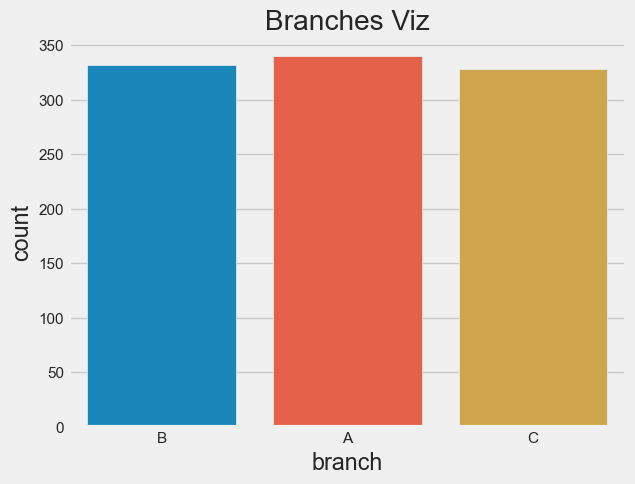

In [106]:
#[Write your Code Here]
sns.countplot(df['branch']).set_title('Branches Viz')

- The branch with the most sales is A

#### Explore a countplot for the `Payment` and `City` Column

Text(0.5, 1.0, 'Payment Viz')

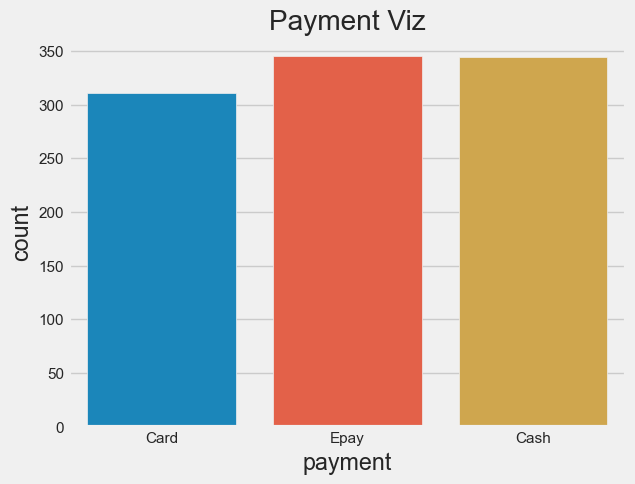

In [107]:
sns.countplot(data = df, x='payment').set_title('Payment Viz')

- The highest payment method is Epay

Text(0.5, 1.0, 'Value Count by Cities Viz')

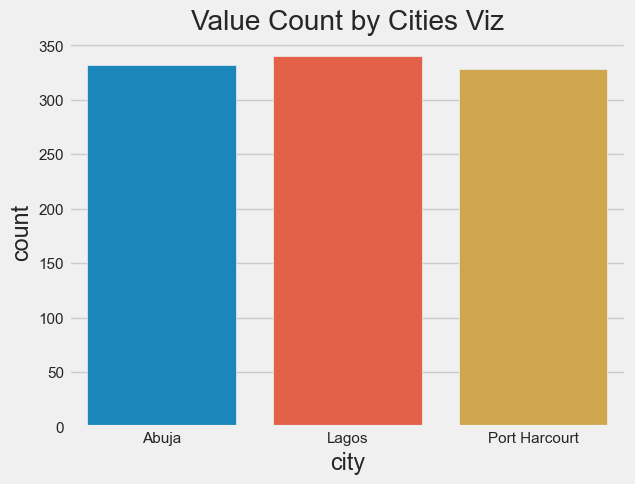

In [108]:
sns.countplot(data = df, x = 'city').set_title('Value Count by Cities Viz')

- The city with most sales is the Lagos City

#### Determine the highest & lowest sold product line, using Countplot 
Count Plot Tips- Set the `Product line` column to y-axis to prevent congestion on the x-axis

Text(0.5, 1.0, 'Product Lines Viz')

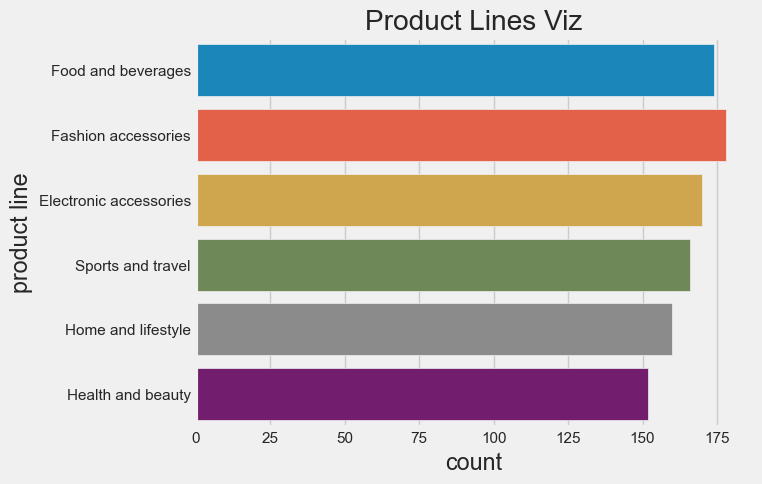

In [109]:
#[Write your Code Here]
sns.countplot(data = df, y = 'product line').set_title('Product Lines Viz')

- The highest product line is Fashion Accessories
- The lowest product line Health and Beauty

#### Determine the Payment channel used by most customer to pay for each product line. Count Plot Tips- Set the "product line" column to y-axis to prevent congestion on the x-axis, and use the "hue" parameter for the "Payment" column. 

Text(0.5, 1.0, 'Product line and Payment method')

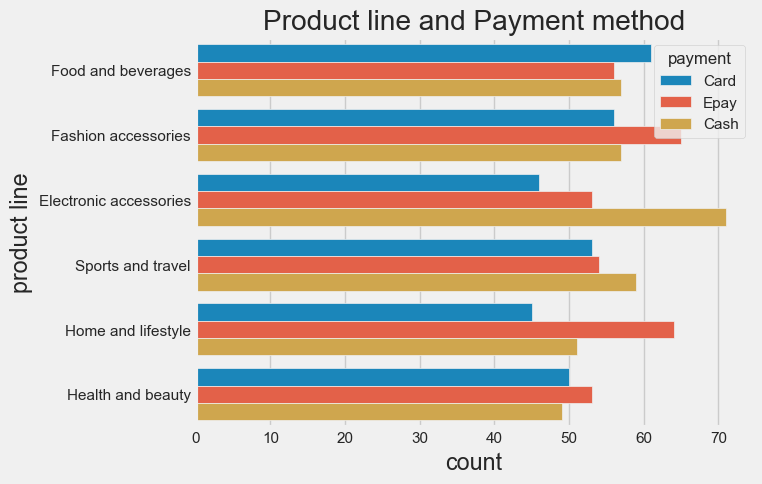

In [110]:
#[Write your Code Here]
sns.countplot(data = df, y = 'product line', hue = 'payment').set_title('Product line and Payment method')

- Food and Beverages uses Card payment the most
- Fashion accessories uses Epay payment method more
- Electronic accessories uses Cash payment method more
- Sports and travel uses Cash payment method more
- Home and Lifestyle uses Epay payment method more 
- Health and beauty uses Epay payment method more

#### Determine the Payment channel for each branch.
Count Plot Tips - Use the hue parameter for the "branch" column

Text(0.5, 1.0, 'Branches showing payment method')

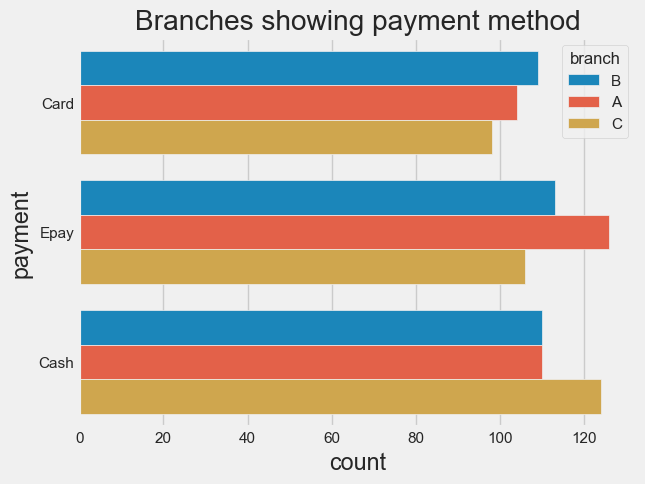

In [111]:
#[Write your Code Here]
sns.countplot(data=df, y='payment', hue='branch').set_title('Branches showing payment method')

- Branch A uses Epay more but use card and cash
- Branch B uses card more but also use epay and cash
- Branch C uses Cash more but also use epay and card

#### Determine the branch with the lowest rating. This you can determine using abox plot which gives a statistical summary of the plotted features, and you can pick out the branch with the lowest rating from the plot

Text(0.5, 1.0, 'Branches showing Ratings')

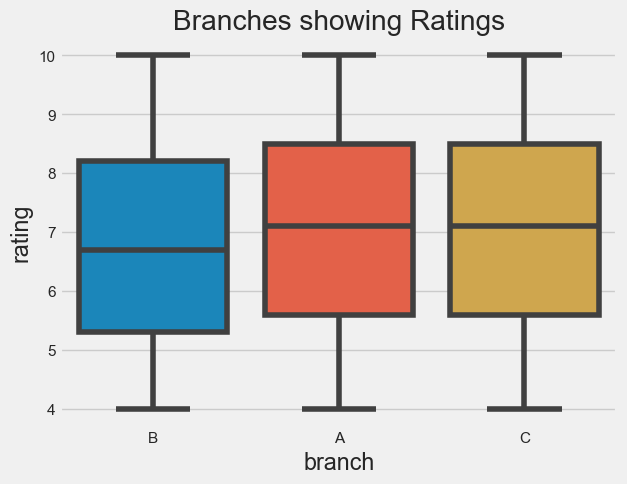

In [112]:
#[Write your Code Here]
sns.boxplot(data = df, x='branch', y='rating').set_title('Branches showing Ratings')

- All three Branches have the same minimum value of 4.0. This can be confirmed using the next code chunk

In [113]:
# To confirm the statement above, I grouped the data frame by the branch column and filtered out the min value
df.groupby(['branch'])['rating'].min()

branch
A    4.0
B    4.0
C    4.0
Name: rating, dtype: float64

#### The gender type often affects the kind of products being purchased at the supermarket. 
* Using a catplot() generate visualization for the "product line" on x-axis, quantity on the y-axis, and hue as gender. 
<br/>

#### Set the aspect parameter to 4, so can you can effectively space out each product line. 



* Plot the same chart, but `Total Column` as the y-axis

* Write a summary of the insights you can pick from this chart.

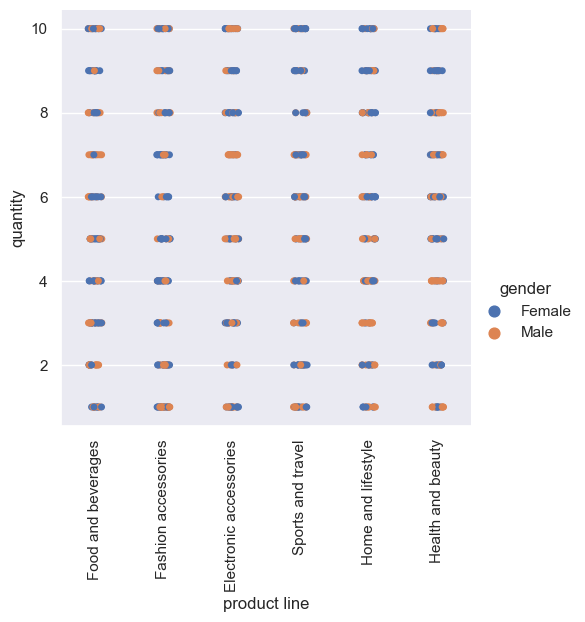

In [114]:
#[Write your Code Here]
sns.set(font_scale = 1.0)
sns.catplot(data = df, x='product line', y='quantity', hue='gender', 
            kind='strip').set_titles('Product line, Qty and Gender').set_xticklabels(rotation = 90)

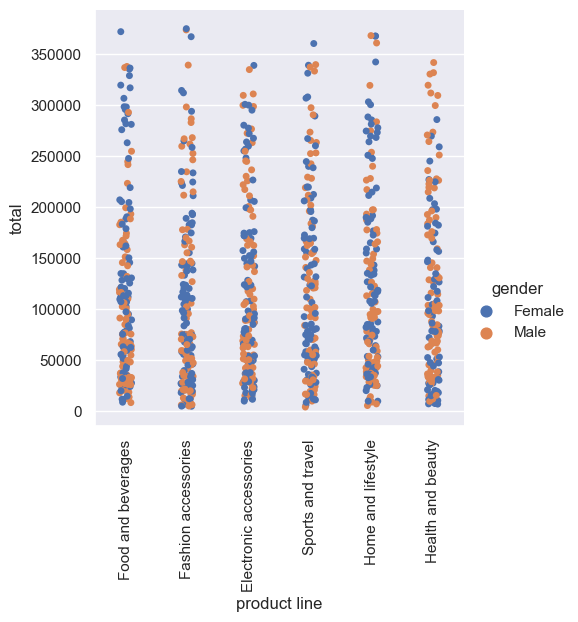

In [115]:
#[Write your Code Here]
sns.catplot(data = df, x='product line', y='total',
            hue='gender').set_titles('Product line, Qty and Gender').set_xticklabels(rotation = 90)

#### An interesting insight to explore is the interaction of Unit price on the Quantity of goods purchased. To achieve this: 
* Use the `catplot()` to plot `Product line per unit price`, and `Product line per Quantity`. Set the kind parameter to `point` 
* In a new cell, Write a summary of the insights you uncovered

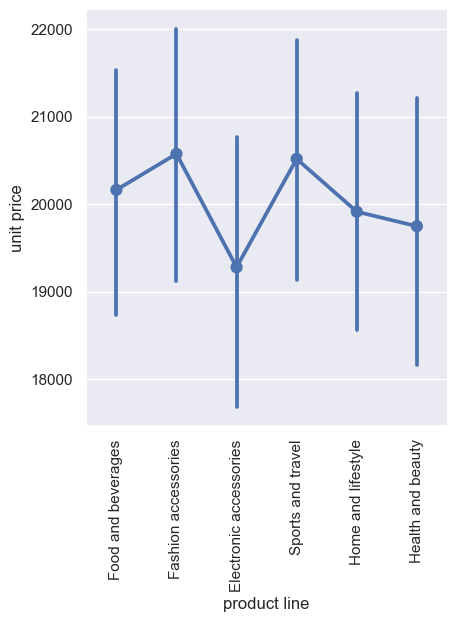

In [116]:
#[Write your Code Here]
sns.catplot(data=df, x='product line', y='unit price',
            kind='point').set_titles('Product per Unit price').set_xticklabels(rotation = 90)

- Electronic accessories recorded the lowest unit prices and 
- fashion accessories have the highest unit price

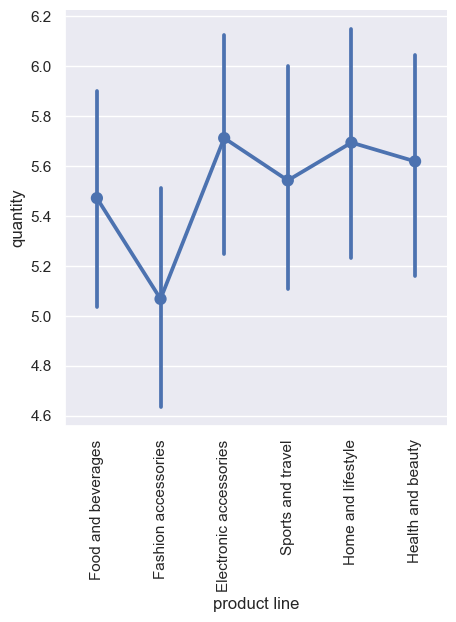

In [117]:
#[Write your Code Here]
g =sns.catplot(x='product line', y='quantity', data=df, kind='point').set_titles('Product per quantity')
g.set_xticklabels(rotation = 90)

- Fashion accessories has the lowest quantity sold one of the reasons would the price per unit compared to other product in the product line
- Electronic accessories sold more in quantity than other product line

## StandOut Section
To make your submission standout, 
* You can continue to explore more insights that can be uncovered with different plotting methods.
* Write a detailed summary on your approach, methods and insights. 
* Visit the [link](https://seaborn.pydata.org/tutorial/categorical.html) for more Seaborn visualization plots.


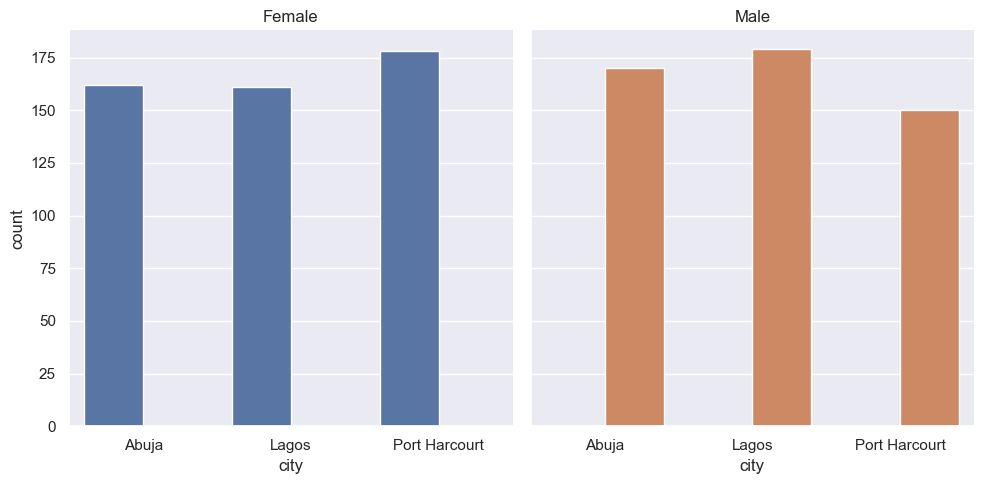

In [118]:
sns.catplot(data=df, x='city',col='gender', hue='gender', kind='count').set_titles('{col_name}')

- This viz tells us that there are more male customers in Abuja and Lagos city hence emphasis should be made on goods predominantly consumed by males

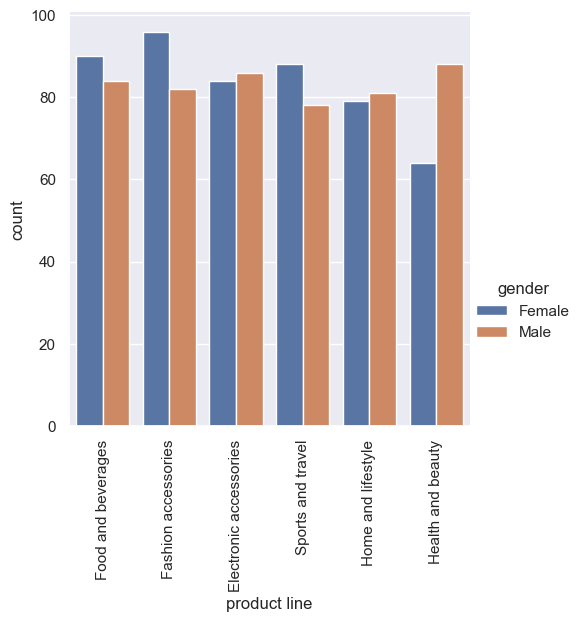

In [119]:
sns.set(font_scale = 1.0)
sns.catplot(data=df, x='product line', hue='gender', 
            kind='count').set_xticklabels(rotation = 90)

- From the viz above, it is deduced that female customers purchase more Fashion accessories from the product line
- From the viz, I discovered that there were more customers who purchased health and beauty products than female
- Also, female bought more sports and travel products

Text(0.5, 1.0, 'Quantity Trend with Time')

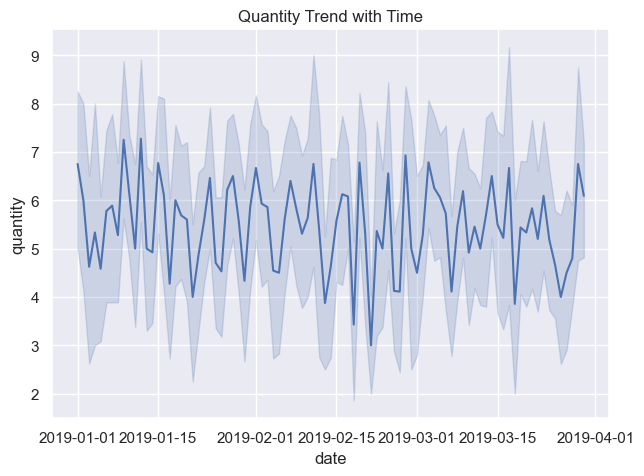

In [120]:
sns.lineplot(x='date', y='quantity',data = df).set_title('Quantity Trend with Time')

Text(0.5, 1.0, 'Gross Income Trend with Time')

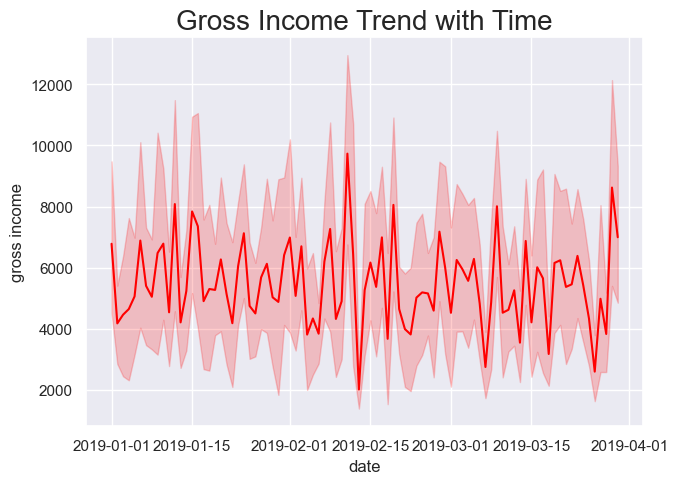

In [121]:
sns.lineplot(x='date', y='gross income', data = df, color='red').set_title('Gross Income Trend with Time', size=20)

- Point to note here is that I used lineplot to measure growth of company xyz.
- The trend shows a nominal value which indicates that company xyz has recorded continuous income range and quantity of goods sold which indicates little or norminal growth rate 

## Documentation.

* A detailed `ReadMe` that describes the project, explains important approach I followed to solve the tasks is available in this repository. I found a template in the starter file that got me started quickly. Note: I did not limit myself to the template, I included interesting step that is worth sharing. 
* An Executive summary is made available to `Company XYZ` management in the repository. The summary will explain the processes and insights I uncovered that can help the company 

## Reach to the README file to get the executive summary of the project